# Task 3: Pandas

## ДЗ №1

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/new-okaerinasai/math-ml-hse-2019/master/sem01_intro/math_students.csv'
data = pd.read_csv(url, on_bad_lines='skip', delimiter=',')

1. Какая причина выбора школы была самой частой? В качестве ответа приведите соответствующее значение признака.

In [4]:
data['reason'].value_counts()

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

In [36]:
data['reason'].mode()

0    course
Name: reason, dtype: object

2. Найдите количество студентов, у родителей которых нет никакого образования.

In [12]:
data[(data['Fedu'] == 0) & (data['Medu'] == 0)].shape[0]

0

3. Найдите минимальный возраст учащегося школы Mousinho da Silveira.

In [15]:
data[data['school'] == 'MS']['age'].min()

17

4. Найдите количество студентов, имеющих нечетное число пропусков.

In [19]:
data[data['absences'] % 2 == 1].shape[0]

41

5. Найдите разность между средними итоговыми оценками студентов, состоящих и не состоящих в романтических отношениях. В качестве ответа приведите число, округленное до двух значащих цифр после запятой.

In [22]:
round(abs(data[data['romantic'] == 'yes']['G3'].mean() - data[data['romantic'] == 'no']['G3'].mean()), 2)

1.26

6. Сколько занятий пропустило большинство студентов с самым частым значением наличия внеклассных активностей?

In [28]:
activities_mode = data['activities'].mode()
activities_mode

0    yes
Name: activities, dtype: object

In [31]:
data[data['activities'] == activities_mode[0]]['absences'].mode()

0    0
Name: absences, dtype: int64

## ДЗ №2. Анализ данных пассажиров "Титаника"

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


1. Сколько мужчин / женщин находилось на борту?

In [39]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

2. Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?

In [45]:
df['Pclass'].value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [46]:
groupby_result = df.groupby(['Sex', 'Pclass']).size()
groupby_result

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
dtype: int64

In [51]:
groupby_result['male', 2]

108

3. Каковы медиана и стандартное отклонение платежей (Fare)? Округлите до 2 десятичных знаков.

In [52]:
round(df['Fare'].median(), 2)

14.45

In [53]:
round(df['Fare'].std(), 2)

49.69

4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?

In [58]:
df[df['Age'] < 30]['Survived'].mean()

0.40625

In [59]:
df[df['Age'] > 60]['Survived'].mean()

0.22727272727272727

5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?

In [61]:
df[df['Sex'] == 'male']['Survived'].mean()

0.18890814558058924

In [62]:
df[df['Sex'] == 'female']['Survived'].mean()

0.7420382165605095

6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?

Самые популярные имена в том виде, в котором они указаны в столбце 'Name':

In [66]:
df[df['Sex'] == 'male']['Name'].mode()

0                  Abbing, Mr. Anthony
1          Abbott, Mr. Rossmore Edward
2                  Abelson, Mr. Samuel
3       Adahl, Mr. Mauritz Nils Martin
4                      Adams, Mr. John
                    ...               
572            de Mulder, Mr. Theodore
573          de Pelsmaeker, Mr. Alfons
574          del Carlo, Mr. Sebastiano
575    van Billiard, Mr. Austin Blyler
576        van Melkebeke, Mr. Philemon
Name: Name, Length: 577, dtype: object

Самые популярные имена с обращениями:

In [76]:
df[df['Sex'] == 'male']['Name'].apply(lambda x: x.split(',')[1]).mode()

0     Mr. James
1      Mr. John
Name: Name, dtype: object

Самые популярные имена без обращений:

In [74]:
df[df['Sex'] == 'male']['Name'].apply(lambda x: x.split(',')[1].split('.')[1].strip()).mode()

0    John
Name: Name, dtype: object

7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?

<AxesSubplot:>

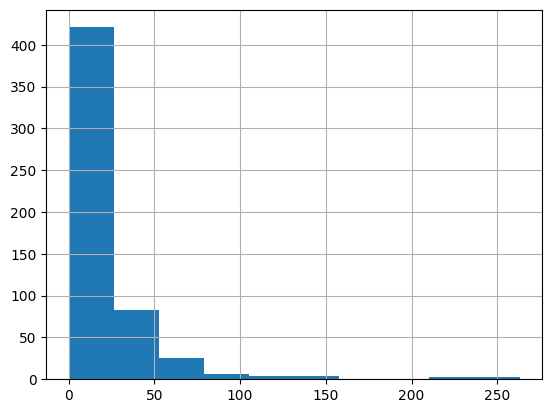

In [77]:
df[df['Survived'] == 0]['Fare'].hist()

<AxesSubplot:>

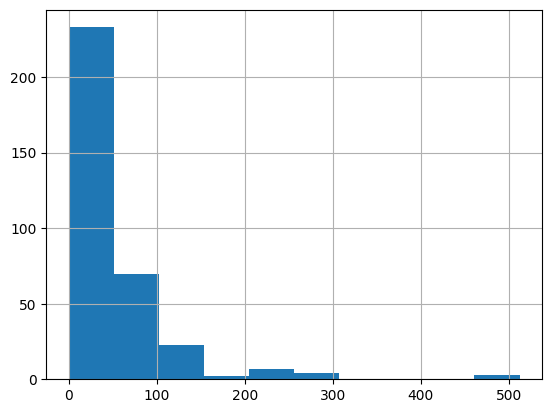

In [78]:
df[df['Survived'] == 1]['Fare'].hist()

<AxesSubplot:>

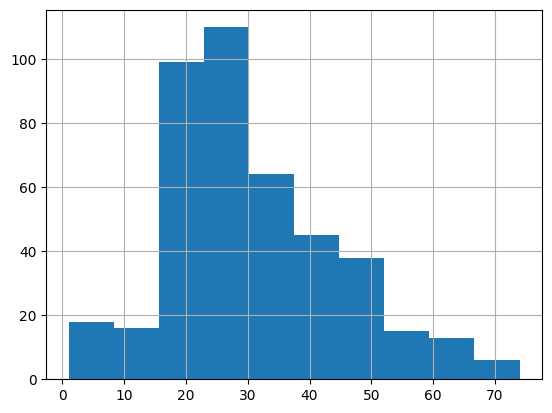

In [79]:
df[df['Survived'] == 0]['Age'].hist()

<AxesSubplot:>

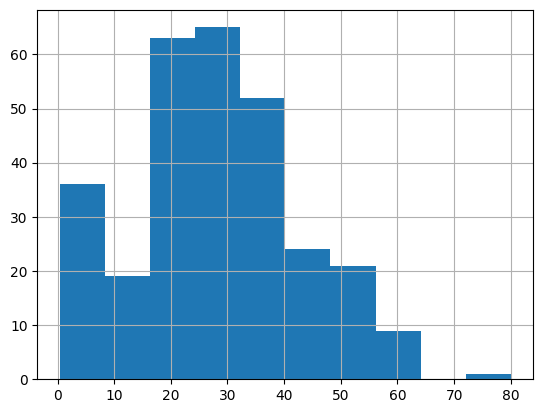

In [80]:
df[df['Survived'] == 1]['Age'].hist()

In [82]:
df.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?

In [83]:
df.groupby(['Sex', 'Pclass'])['Age'].mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64